# Обработка данных

In [357]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display_html, HTML
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
plt.style.use('ggplot')
pd.options.display.max_columns = 200

In [358]:
dl = pd.read_csv('/Users/ivansidorov/Downloads/Датасет шахматисты мнение.csv', index_col=0)[:25000]
print(dl.shape)

dl.head()

(25000, 18)


,Site,Date,Round,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,WhiteTitle,BlackTitle
Event,,,,,,,,,,,,,,,,,,
Rated Rapid tournament https://lichess.org/tournament/5xNbZvbs,https://lichess.org/uManRThA,2023.03.01,-,Apostolis_L,laurent971,1-0,1,55,1326,1328,6.0,-6.0,C62,Ruy Lopez: Steinitz Defense,600+0,Normal,NaN,NaN
Rated Blitz game,https://lichess.org/j82WFG7O,2023.03.01,-,Chawteenn,EidosRock,1-0,1,29,1749,1775,6.0,-6.0,D32,Tarrasch Defense,180+0,Normal,NaN,NaN
Rated Blitz game,https://lichess.org/VVmF1x2d,2023.03.01,-,mathmatical,Ilieck,0-1,1,52,2030,2059,-5.0,6.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,NaN,NaN
Rated Rapid game,https://lichess.org/RagJpQJI,2023.03.01,-,Haze0809,Keykodeus,0-1,1,48,1204,1278,-5.0,116.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,600+0,Normal,NaN,NaN
Rated Bullet game,https://lichess.org/y3hgXe5H,2023.03.01,-,PaPanDreo,Solus-Christus,0-1,1,97,1545,1564,-5.0,6.0,C50,"Italian Game: Giuoco Pianissimo, Italian Four ...",120+1,Normal,NaN,NaN


In [359]:
df = pd.read_csv("/Users/ivansidorov/Downloads/final.csv", index_col=0)
df["time_control"] = dl["TimeControl"].values
df["utc_date"] = dl["UTCDate"].values
df["utc_time"] = dl["UTCTime"].values

## Шаг 1: Первый взгляд на данные

*shape, head, columns, dtypes, describe*

In [360]:
df.shape

(25000, 68)

In [361]:
df.head()

,Username_x,Mode_x,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,deviation_x,imported game_x,playing_x,Username_y,Mode_y,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,deviation_y,imported game_y,playing_y,white_score,time_control,utc_date,utc_time
0,Apostolis_L,Blitz,0.0,0.0,1034.0,1337.0,0.0,0.0,0.0,0.0,0.0,0.0,1421.0,15.0,0.0,11.0,385.0,372.0,103.0,274.0,8.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,109.0,108.07,NaN,NaN,laurent971,Blitz,0.0,0.0,1177.0,1368.0,1434.0,0.0,0.0,0.0,0.0,0.0,1424.0,0.0,0.0,0.0,16442.0,16390.0,5954.0,9556.0,932.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,59.68,NaN,NaN,1-0,600+0,1,55
1,Chawteenn,Blitz,0.0,1724.0,1851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,0.0,0.0,0.0,15098.0,15077.0,7184.0,7038.0,876.0,17.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,45.02,NaN,NaN,EidosRock,Blitz,0.0,0.0,1969.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,5144.0,5140.0,2563.0,2494.0,87.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,45.14,NaN,NaN,1-0,180+0,1,29
2,mathmatical,Blitz,0.0,2037.0,1978.0,2072.0,0.0,2275.0,0.0,0.0,0.0,0.0,2415.0,0.0,0.0,0.0,20147.0,20073.0,10115.0,9364.0,668.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,6.0,45.89,NaN,NaN,Ilieck,Blitz,1279.0,1618.0,1990.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,0.0,0.0,0.0,16101.0,16084.0,7850.0,7581.0,670.0,12.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,45.15,NaN,NaN,0-1,180+0,1,52
3,Haze0809,Blitz,0.0,1027.0,944.0,1266.0,1201.0,0.0,0.0,0.0,0.0,0.0,1486.0,0.0,0.0,0.0,1322.0,1294.0,624.0,653.0,45.0,2.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,140.48,NaN,NaN,Keykodeus,Blitz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,61.0,30.0,42.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0-1,600+0,1,48
4,PaPanDreo,Blitz,0.0,1609.0,1632.0,1820.0,1870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28603.0,28592.0,13754.0,13819.0,1030.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,82.28,NaN,NaN,Solus-Christus,Blitz,0.0,1638.0,1644.0,1924.0,0.0,0.0,0.0,1526.0,0.0,0.0,2023.0,0.0,0.0,0.0,4742.0,4739.0,2320.0,2320.0,102.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,80.43,NaN,NaN,0-1,120+1,1,97


In [362]:
df.columns

Index(['Username_x', 'Mode_x', 'UltraBullet_x', 'Bullet_x', 'Blitz_x',
       'Rapid_x', 'Classical_x', 'Correspondence_x', 'Crazyhouse_x',
       'Chess960_x', 'Antichess_x', 'Horde_x', 'Puzzles_x', 'Puzzle Storm_x',
       'Puzzle Racer_x', 'Puzzle Streak_x', 'games_x', 'rated_x', 'wins_x',
       'losses_x', 'draws_x', 'bookmarks_x', 'win_streak_x', 'lose_streak_x',
       'King of the Hill_x', 'Three-check_x', 'Atomic_x', 'Racing Kings_x',
       'imported games_x', 'deviation_x', 'imported game_x', 'playing_x',
       'Username_y', 'Mode_y', 'UltraBullet_y', 'Bullet_y', 'Blitz_y',
       'Rapid_y', 'Classical_y', 'Correspondence_y', 'Crazyhouse_y',
       'Chess960_y', 'Antichess_y', 'Horde_y', 'Puzzles_y', 'Puzzle Storm_y',
       'Puzzle Racer_y', 'Puzzle Streak_y', 'games_y', 'rated_y', 'wins_y',
       'losses_y', 'draws_y', 'bookmarks_y', 'win_streak_y', 'lose_streak_y',
       'King of the Hill_y', 'Three-check_y', 'Atomic_y', 'Racing Kings_y',
       'imported games_y', 'de

In [363]:
df["white_score"].unique()

array(['1-0', '0-1', '1/2-1/2', '*'], dtype=object)

In [364]:
df = df.drop(df[df['white_score'] == '*'].index)

In [365]:
label = LabelEncoder()

df["white_score"] = label.fit_transform(df["white_score"])

In [366]:
df.head()

,Username_x,Mode_x,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,deviation_x,imported game_x,playing_x,Username_y,Mode_y,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,deviation_y,imported game_y,playing_y,white_score,time_control,utc_date,utc_time
0,Apostolis_L,Blitz,0.0,0.0,1034.0,1337.0,0.0,0.0,0.0,0.0,0.0,0.0,1421.0,15.0,0.0,11.0,385.0,372.0,103.0,274.0,8.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,109.0,108.07,NaN,NaN,laurent971,Blitz,0.0,0.0,1177.0,1368.0,1434.0,0.0,0.0,0.0,0.0,0.0,1424.0,0.0,0.0,0.0,16442.0,16390.0,5954.0,9556.0,932.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,59.68,NaN,NaN,1,600+0,1,55
1,Chawteenn,Blitz,0.0,1724.0,1851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,0.0,0.0,0.0,15098.0,15077.0,7184.0,7038.0,876.0,17.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,45.02,NaN,NaN,EidosRock,Blitz,0.0,0.0,1969.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,5144.0,5140.0,2563.0,2494.0,87.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,45.14,NaN,NaN,1,180+0,1,29
2,mathmatical,Blitz,0.0,2037.0,1978.0,2072.0,0.0,2275.0,0.0,0.0,0.0,0.0,2415.0,0.0,0.0,0.0,20147.0,20073.0,10115.0,9364.0,668.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,6.0,45.89,NaN,NaN,Ilieck,Blitz,1279.0,1618.0,1990.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,0.0,0.0,0.0,16101.0,16084.0,7850.0,7581.0,670.0,12.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,45.15,NaN,NaN,0,180+0,1,52
3,Haze0809,Blitz,0.0,1027.0,944.0,1266.0,1201.0,0.0,0.0,0.0,0.0,0.0,1486.0,0.0,0.0,0.0,1322.0,1294.0,624.0,653.0,45.0,2.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,140.48,NaN,NaN,Keykodeus,Blitz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,61.0,30.0,42.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,600+0,1,48
4,PaPanDreo,Blitz,0.0,1609.0,1632.0,1820.0,1870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28603.0,28592.0,13754.0,13819.0,1030.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,82.28,NaN,NaN,Solus-Christus,Blitz,0.0,1638.0,1644.0,1924.0,0.0,0.0,0.0,1526.0,0.0,0.0,2023.0,0.0,0.0,0.0,4742.0,4739.0,2320.0,2320.0,102.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,80.43,NaN,NaN,0,120+1,1,97


In [367]:
print(df.dtypes.unique())

df.dtypes

[dtype('O') dtype('float64') dtype('int64')]


Username_x        object
Mode_x            object
UltraBullet_x    float64
Bullet_x         float64
Blitz_x          float64
                  ...   
playing_y        float64
white_score        int64
time_control      object
utc_date           int64
utc_time           int64
Length: 68, dtype: object

In [368]:
df.describe()

,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,deviation_x,imported game_x,playing_x,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,deviation_y,imported game_y,playing_y,white_score,utc_date,utc_time
count,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,2.443600e+04,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24436.000000,24067.000000,888.0,1651.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,2.443400e+04,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24434.000000,24071.000000,912.0,1500.000000,24993.000000,24993.000000,24993.000000
mean,217.564700,1228.987641,1523.443362,1262.993862,417.881773,100.688861,124.717752,190.104231,78.082051,73.991447,1394.967384,5.516819,6.085611,4.802136,1.098256e+04,10659.032411,5334.843428,5237.322229,410.212801,15.764282,6.506384,5.027910,71.981462,87.542765,82.411770,44.968162,2.796243,86.202672,1.0,1.652332,217.727224,1227.835311,1530.784481,1259.448064,417.742163,97.504707,125.867275,193.635303,81.685193,74.833593,1396.243718,5.463739,5.925841,4.766596,1.117397e+04,10802.887206,5433.097405,5320.565810,420.261603,15.798559,6.566342,5.019972,71.203569,88.401203,80.926332,44.886511,2.922485,85.074398,1.0,1.999333,0.566599,2.925259,47808.031489
std,515.044592,745.048051,546.377487,792.032968,734.536958,407.669963,434.259310,533.173136,319.242104,342.360846,808.426169,12.712820,15.730268,12.372746,2.129322e+04,18157.156275,10458.353998,10449.422847,1098.865493,140.529085,6.884127,5.772592,345.090676,366.427755,320.578267,261.424449,51.424945,83.149541,0.0,2.687394,514.684392,745.724430,540.372839,793.706978,734.927621,400.911346,435.590461,537.200099,326.826540,345.603548,811.674424,12.640835,15.568649,12.363884,2.425894e+04,18267.607690,12250.870209,10931.860303,1467.300474,171.174071,8.349091,5.644484,341.477575,367.387696,317.854442,260.548885,57.023898,80.821901,0.0,8.584431,0.569210,1.385290,22074.359320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.0,1.000000,0.000000,1.000000,0.000000
25%,0.000000,881.000000,1275.000000,650.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1130.000000,0.000000,0.000000,0.000000,1.631750e+03,1538.000000,781.000000,776.000000,57.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.330000,1.0,1.000000,0.000000,881.000000,1284.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,0.000000,1.619500e+03,1528.250000,773.000000,775.250000,58.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,

## Шаг 2: Подготовление датасета

1) Удаление ненужных столбцов
2) Удаление дупликатов
3) Feature Engeneering

In [369]:
df.time_control.unique()

array(['600+0', '180+0', '120+1', '120+0', '60+0', '180+2', '300+0',
       '300+3', '30+0', '420+0', '15+0', '600+5', '360+0', '30+2',
       '1800+0', '900+10', '90+0', '90+2', '600+3', '-', '60+1', '900+3',
       '15+4', '900+0', '420+2', '720+5', '15+1', '660+0', '480+0',
       '120+2', '600+2', '300+5', '0+1', '720+1', '300+6', '180+1',
       '300+2', '1200+3', '45+1', '1500+4', '60+2', '180+8', '360+10',
       '480+2', '1800+10', '240+3', '240+0', '720+7', '1020+9', '300+8',
       '1200+30', '0+4', '360+7', '45+3', '0+9', '90+1', '300+11',
       '120+3', '420+3', '300+4', '420+1', '1800+3', '300+1', '1200+0',
       '720+0', '300+20', '0+3', '420+5', '900+5', '0+5', '60+11',
       '180+3', '1020+3', '240+1', '900+15', '840+3', '360+35', '1500+3',
       '45+5', '180+5', '240+2', '120+9', '1500+5', '45+0', '1800+20',
       '300+7', '10800+20', '900+8', '1200+5', '1200+7', '60+3', '660+19',
       '480+8', '30+1', '420+10', '1500+0', '600+1', '600+17', '360+3',
       '480+

In [370]:
df = df.drop(df[df['time_control'] == '-'].index)

In [371]:
def fix_time(s: str):
    fix = s.split('+')[0]
    return int(fix)

def add_time(s: str):
    add = s.split('+')[1]
    return int(add)

df["fix_time"] = df["time_control"].apply(fix_time)
df["add_time"] = df["time_control"].apply(add_time)

df.head()

,Username_x,Mode_x,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,deviation_x,imported game_x,playing_x,Username_y,Mode_y,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,deviation_y,imported game_y,playing_y,white_score,time_control,utc_date,utc_time,fix_time,add_time
0,Apostolis_L,Blitz,0.0,0.0,1034.0,1337.0,0.0,0.0,0.0,0.0,0.0,0.0,1421.0,15.0,0.0,11.0,385.0,372.0,103.0,274.0,8.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,109.0,108.07,NaN,NaN,laurent971,Blitz,0.0,0.0,1177.0,1368.0,1434.0,0.0,0.0,0.0,0.0,0.0,1424.0,0.0,0.0,0.0,16442.0,16390.0,5954.0,9556.0,932.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,59.68,NaN,NaN,1,600+0,1,55,600,0
1,Chawteenn,Blitz,0.0,1724.0,1851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,0.0,0.0,0.0,15098.0,15077.0,7184.0,7038.0,876.0,17.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,45.02,NaN,NaN,EidosRock,Blitz,0.0,0.0,1969.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,5144.0,5140.0,2563.0,2494.0,87.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,45.14,NaN,NaN,1,180+0,1,29,180,0
2,mathmatical,Blitz,0.0,2037.0,1978.0,2072.0,0.0,2275.0,0.0,0.0,0.0,0.0,2415.0,0.0,0.0,0.0,20147.0,20073.0,10115.0,9364.0,668.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,6.0,45.89,NaN,NaN,Ilieck,Blitz,1279.0,1618.0,1990.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,0.0,0.0,0.0,16101.0,16084.0,7850.0,7581.0,670.0,12.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,45.15,NaN,NaN,0,180+0,1,52,180,0
3,Haze0809,Blitz,0.0,1027.0,944.0,1266.0,1201.0,0.0,0.0,0.0,0.0,0.0,1486.0,0.0,0.0,0.0,1322.0,1294.0,624.0,653.0,45.0,2.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,140.48,NaN,NaN,Keykodeus,Blitz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,61.0,30.0,42.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,600+0,1,48,600,0
4,PaPanDreo,Blitz,0.0,1609.0,1632.0,1820.0,1870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28603.0,28592.0,13754.0,13819.0,1030.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,82.28,NaN,NaN,Solus-Christus,Blitz,0.0,1638.0,1644.0,1924.0,0.0,0.0,0.0,1526.0,0.0,0.0,2023.0,0.0,0.0,0.0,4742.0,4739.0,2320.0,2320.0,102.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,80.43,NaN,NaN,0,120+1,1,97,120,1


In [372]:
df = df.drop_duplicates(subset=['Username_x', 'Username_y', 'utc_date', 'utc_time'], keep='first')

In [373]:
# удаляем все столбцы, где указан формат партии, мы и так знаем, что это Blitz
df.drop(columns=["Mode_x", "Mode_y"], axis=1, inplace=True)

# удаляем ники игроков, так как вероятность того, что наш юзер выберет ту пару, которая уже играла между собой достаточно мала
df.drop(columns=["Username_x", "Username_y"], axis=1, inplace=True)

# imported games очень часто не указываются у шахматистов, как и признак playing, поэтому мы приняли решение его удалить
df.drop(columns=["playing_x", "imported game_x", "playing_y", "imported game_y"], axis=1, inplace=True)
# df.drop(columns=["playing_x", "imported game_x", "deviation_x", "playing_y", "imported game_y", "deviation_y"], axis=1, inplace=True)

# так как мы разделили временной формат на два столбца: фиксированное время и добавочное, он нам больше не нужен
df.drop(columns=["time_control"], axis=1, inplace=True)

df.dropna(inplace=True)

df.head()

,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,deviation_x,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,deviation_y,white_score,utc_date,utc_time,fix_time,add_time
0,0.0,0.0,1034.0,1337.0,0.0,0.0,0.0,0.0,0.0,0.0,1421.0,15.0,0.0,11.0,385.0,372.0,103.0,274.0,8.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,109.0,108.07,0.0,0.0,1177.0,1368.0,1434.0,0.0,0.0,0.0,0.0,0.0,1424.0,0.0,0.0,0.0,16442.0,16390.0,5954.0,9556.0,932.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,59.68,1,1,55,600,0
1,0.0,1724.0,1851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,0.0,0.0,0.0,15098.0,15077.0,7184.0,7038.0,876.0,17.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,45.02,0.0,0.0,1969.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,5144.0,5140.0,2563.0,2494.0,87.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,45.14,1,1,29,180,0
2,0.0,2037.0,1978.0,2072.0,0.0,2275.0,0.0,0.0,0.0,0.0,2415.0,0.0,0.0,0.0,20147.0,20073.0,10115.0,9364.0,668.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,6.0,45.89,1279.0,1618.0,1990.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,0.0,0.0,0.0,16101.0,16084.0,7850.0,7581.0,670.0,12.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,45.15,0,1,52,180,0
4,0.0,1609.0,1632.0,1820.0,1870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28603.0,28592.0,13754.0,13819.0,1030.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,82.28,0.0,1638.0,1644.0,1924.0,0.0,0.0,0.0,1526.0,0.0,0.0,2023.0,0.0,0.0,0.0,4742.0,4739.0,2320.0,2320.0,102.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,80.43,0,1,97,120,1
5,0.0,1873.0,1755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5156.0,5112.0,2509.0,2446.0,201.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,45.58,0.0,0.0,1676.0,1595.0,0.0,0.0,0.0,0.0,0.0,0.0,1550.0,0.0,0.0,28.0,1998.0,1998.0,992.0,933.0,73.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,46.48,0,1,142,180,0


In [374]:
df.shape

(23203, 61)

In [375]:
df.isna().sum().sum()

0

# Feature Engeneering

1) Доля побед

In [376]:
df['prop_x'] = df['wins_x'] / df['games_x']
df['prop_y'] = df['wins_y'] / df['games_y']

2) Отношение побед к поражениям

In [377]:
df['win2loss_x'] = df['wins_x'] / df['losses_x']
df['win2loss_y'] = df['wins_y'] / df['losses_y']

3) Разница в рейтингах

In [378]:
df['win2loss_x'] = abs(df['rated_x'] - df['rated_y'])

4) Индикатор того, что рейтинг в режиме Blitz выше среднего

In [379]:
df['ind_greater_mean_x'] = (df['Blitz_x'].values > df[['Blitz_x', 'Blitz_y']].values.mean()) * 1
df['ind_greater_mean_y'] = (df['Blitz_x'] > df[['Blitz_x', 'Blitz_y']].values.mean()) * 1

In [380]:
df.head()

,UltraBullet_x,Bullet_x,Blitz_x,Rapid_x,Classical_x,Correspondence_x,Crazyhouse_x,Chess960_x,Antichess_x,Horde_x,Puzzles_x,Puzzle Storm_x,Puzzle Racer_x,Puzzle Streak_x,games_x,rated_x,wins_x,losses_x,draws_x,bookmarks_x,win_streak_x,lose_streak_x,King of the Hill_x,Three-check_x,Atomic_x,Racing Kings_x,imported games_x,deviation_x,UltraBullet_y,Bullet_y,Blitz_y,Rapid_y,Classical_y,Correspondence_y,Crazyhouse_y,Chess960_y,Antichess_y,Horde_y,Puzzles_y,Puzzle Storm_y,Puzzle Racer_y,Puzzle Streak_y,games_y,rated_y,wins_y,losses_y,draws_y,bookmarks_y,win_streak_y,lose_streak_y,King of the Hill_y,Three-check_y,Atomic_y,Racing Kings_y,imported games_y,deviation_y,white_score,utc_date,utc_time,fix_time,add_time,prop_x,prop_y,win2loss_x,win2loss_y,ind_greater_mean_x,ind_greater_mean_y
0,0.0,0.0,1034.0,1337.0,0.0,0.0,0.0,0.0,0.0,0.0,1421.0,15.0,0.0,11.0,385.0,372.0,103.0,274.0,8.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,109.0,108.07,0.0,0.0,1177.0,1368.0,1434.0,0.0,0.0,0.0,0.0,0.0,1424.0,0.0,0.0,0.0,16442.0,16390.0,5954.0,9556.0,932.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,59.68,1,1,55,600,0,0.267532,0.362121,16018.0,0.623064,0,0
1,0.0,1724.0,1851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,0.0,0.0,0.0,15098.0,15077.0,7184.0,7038.0,876.0,17.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,45.02,0.0,0.0,1969.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,5144.0,5140.0,2563.0,2494.0,87.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,45.14,1,1,29,180,0,0.475825,0.498250,9937.0,1.027666,1,1
2,0.0,2037.0,1978.0,2072.0,0.0,2275.0,0.0,0.0,0.0,0.0,2415.0,0.0,0.0,0.0,20147.0,20073.0,10115.0,9364.0,668.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,6.0,45.89,1279.0,1618.0,1990.0,0.0,0.0,0.0,0.0,1815.0,0.0,0.0,0.0,0.0,0.0,0.0,16101.0,16084.0,7850.0,7581.0,670.0,12.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,45.15,0,1,52,180,0,0.502060,0.487547,3989.0,1.035483,1,1
4,0.0,1609.0,1632.0,1820.0,1870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28603.0,28592.0,13754.0,13819.0,1030.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,82.28,0.0,1638.0,1644.0,1924.0,0.0,0.0,0.0,1526.0,0.0,0.0,2023.0,0.0,0.0,0.0,4742.0,4739.0,2320.0,2320.0,102.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,80.43,0,1,97,120,1,0.480859,0.489245,23853.0,1.000000,1,1
5,0.0,1873.0,1755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5156.0,5112.0,2509.0,2446.0,201.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,45.58,0.0,0.0,1676.0,1595.0,0.0,0.0,0.0,0.0,0.0,0.0,1550.0,0.0,0.0,28.0,1998.0,1998.0,992.0,933.0,73.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,46.48,0,1,142,180,0,0.486618,0.496496,3114.0,1.063237,1,1


In [381]:
df.to_csv("chess_preprocessed_again.csv")

# EDA, щупаем данные

## Шаг 1: Для начала посмотрим какие интересные связи можно заметить между непосредственными соперниками

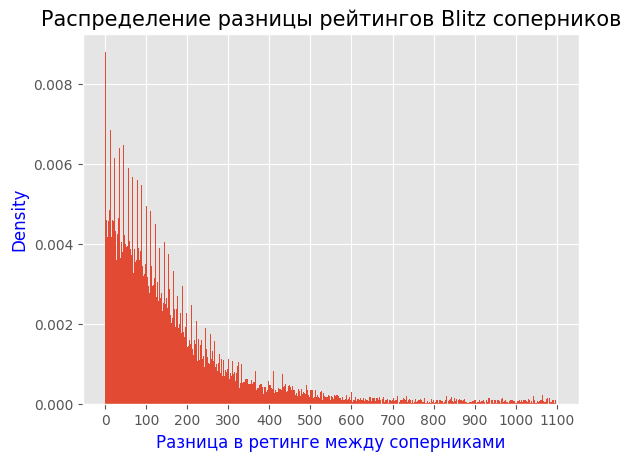

In [382]:
diff = abs(df["Blitz_x"] - df["Blitz_y"])

plt.hist(diff[diff < 1100], bins=500, density=True)
plt.xlabel("Разница в ретинге между соперниками", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.xticks(np.arange(0, 1101, 100))
plt.title("Распределение разницы рейтингов Blitz соперников", fontsize=15)
plt.show()

__Вывод__: *Также можем посмотреть на распределение разницы рейтингов соперников, тогда мы увидим, что логично, игроки играют с равными себе по уровню*

In [383]:
diff[abs(diff) > 100].size / diff.size

0.5800974011981209

__Вывод__: более трети игр проводится с разницой в рейтинге большей, чем 100, что говорит о том что на личессе шахматисты часто мэтчатся для блитс игр с довольно непохожими соперниками, возможно это связано с тем, что многие игроки до сих пор имеют дефолтный рейтинг личесс - 1500 и им в пары ставят более низкорейтинговых игроков

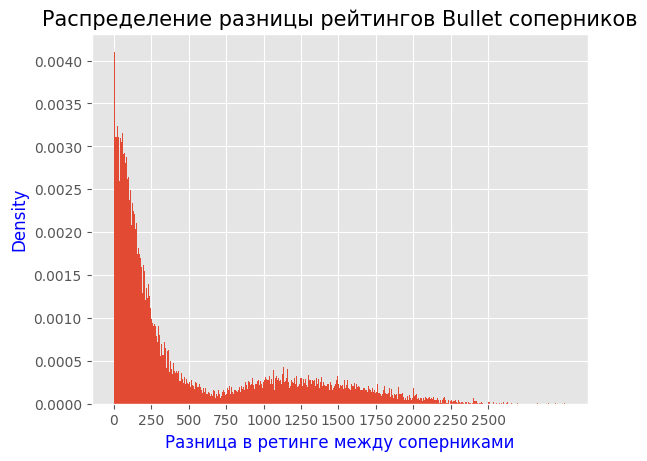

In [384]:
diff = abs(df["Bullet_x"] - df["Bullet_y"])

plt.hist(diff[diff > 0], bins=500, density=True)
plt.xlabel("Разница в ретинге между соперниками", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.xticks(np.arange(0, 2501, 250))
plt.title("Распределение разницы рейтингов Bullet соперников", fontsize=15)
plt.show()

__Вывод__: казалось бы временной формат Bullet самый похожий на Blitz, однако приэтом у соперников не прослеживается похожесть распределений разниц рейтингов в Blitz с разницой рейтингов в Bullet, что все же говорит о том, что некоторым страшно играть с таким малым временем как минута, либо же просто неинтересно)

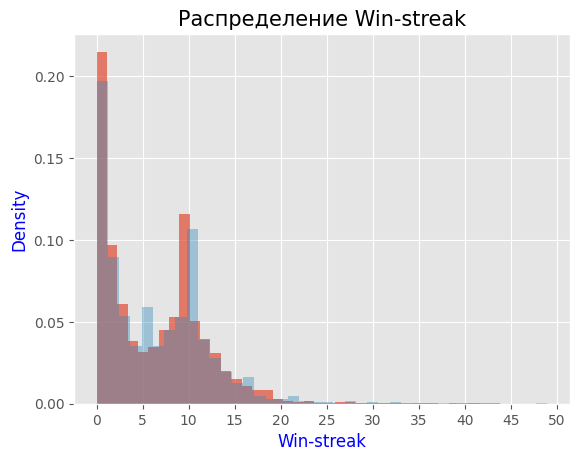

In [385]:
win_streak_x_winner = df["win_streak_x"][df["white_score"] == 1].values
win_streak_y_winner = df["win_streak_y"][df["white_score"] == 0].values
np.append(win_streak_x_winner, win_streak_y_winner)

win_streak_x_loser = df["win_streak_x"][df["white_score"] == 0].values
win_streak_y_loser = df["win_streak_y"][df["white_score"] == 1].values
np.append(win_streak_x_loser, win_streak_y_loser)

plt.hist(win_streak_x_winner[win_streak_x_winner < 50], bins=40, alpha=0.7, density=True)
plt.hist(win_streak_x_loser[win_streak_x_loser < 50], bins=40, alpha=0.4, density=True)
plt.xticks(np.arange(0, 51, 5))
plt.ylabel("Density", color="blue", fontsize=12)
plt.xlabel("Win-streak", color="blue", fontsize=12)
plt.title("Распределение Win-streak", fontsize=15)
plt.show()

__Вывод__: Видим, что win_streak не влияет почти что на то, победит игрок в следующей партии или же нет

## Шаг 2: Теперь посмотрим на интересные заокномерности в режимах игр, по всем игрокам вместе, не учитывая соперничество

In [386]:
d = df["Blitz_x"]
g = df["Blitz_y"]

dg = pd.concat([d, g], axis=0, ignore_index=True)
dg.shape

(46406,)

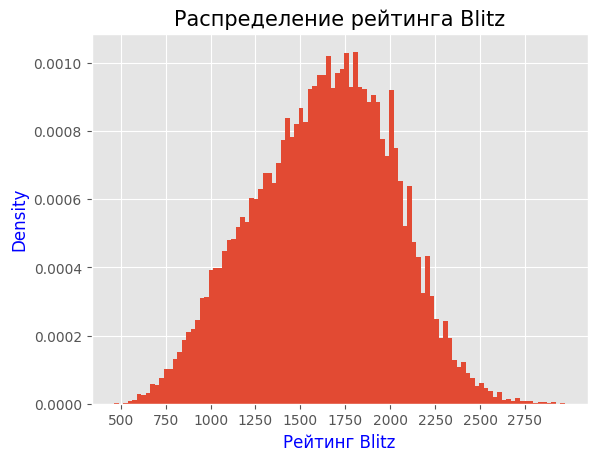

In [387]:
plt.hist(dg[dg > 0], bins=100, density=True)
plt.xlabel("Рейтинг Blitz", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.xticks(np.arange(500, 2751, 250))
plt.title("Распределение рейтинга Blitz", fontsize=15)
plt.show()

__Вывод__: распределение рейтингов в Blitz похоже на нормальное, с мат ожиданием в 1500, что логично, ведь это дефолтный рейтинг, который выдает лтчесс, при регистрации

In [388]:
df["add_time"].value_counts(normalize=True)

0     0.736543
2     0.089256
1     0.077533
3     0.059992
5     0.025040
10    0.007240
8     0.000862
4     0.000776
20    0.000776
15    0.000560
7     0.000474
9     0.000215
30    0.000129
11    0.000129
6     0.000086
19    0.000086
17    0.000086
12    0.000086
35    0.000043
45    0.000043
14    0.000043
Name: add_time, dtype: float64

__Вывод__: люди почти в 75% случаев играют без добавочного времени, либо предпочитают вриант 2 секунды, который часто предлагается в качестве основного

In [389]:
df["fix_time"].value_counts(normalize=True)

60       0.279016
180      0.276990
300      0.200405
600      0.125717
120      0.074128
15       0.010042
900      0.008792
30       0.008189
1800     0.004396
420      0.002629
1200     0.001638
480      0.001422
0        0.001207
360      0.001034
240      0.000948
90       0.000690
1500     0.000517
720      0.000431
45       0.000431
540      0.000345
660      0.000215
780      0.000129
1020     0.000129
840      0.000086
1080     0.000086
5400     0.000086
2700     0.000086
1140     0.000086
960      0.000043
3600     0.000043
10800    0.000043
Name: fix_time, dtype: float64

__Вывод__: Чаще всего люди играют в 1, 3 и 5 минутки, что опять же является эталоном данного формата партий, причем партии покороче (1 и 3 мин) предпочитают чуть сильнее более долгим (5 мин), что говорит про скороходность и возможно желание безолаберно играть партии

In [390]:
print(f"Количество признаков, которые более чем на 2/3 разрежены: {df[df == 0].count().sort_values(ascending=False)[df[df == 0].count().sort_values(ascending=False).values > df.shape[0] / 1.5].count()}")

df[df == 0].count().sort_values(ascending=False)[df[df == 0].count().sort_values(ascending=False).values > df.shape[0] / 1.5]

Количество признаков, которые более чем на 2/3 разрежены: 31


Racing Kings_x        22522
Racing Kings_y        22517
King of the Hill_x    22226
King of the Hill_y    22206
Horde_y               22145
Horde_x               22136
Three-check_x         21924
Three-check_y         21896
Correspondence_y      21886
Correspondence_x      21850
Antichess_x           21849
Antichess_y           21797
Atomic_y              21731
Atomic_x              21714
imported games_x      21581
imported games_y      21554
Crazyhouse_x          21394
Crazyhouse_y          21369
Chess960_x            20505
Chess960_y            20472
UltraBullet_x         19527
UltraBullet_y         19516
Puzzle Racer_y        19424
Puzzle Racer_x        19320
Puzzle Streak_y       18622
Puzzle Streak_x       18569
Puzzle Storm_y        18434
Puzzle Storm_x        18360
Classical_x           17280
Classical_y           17274
add_time              17090
dtype: int64

__Вывод__: мы имеем очень разреженные данные, в частности по признакам, которые отвечают за странные форматы игры: без дам, с перемещенными фигурами и так далее

In [391]:
d = df[["games_x", "rated_x"]]
k = df[["games_y", "rated_y"]].rename(columns={"games_y": "games_x", "rated_y": "rated_x"})

dk = pd.concat([d, k], ignore_index=True)

dk = dk.rename(columns={"games_x": "games", "rated_x": "rated"})

dk.shape

(46406, 2)

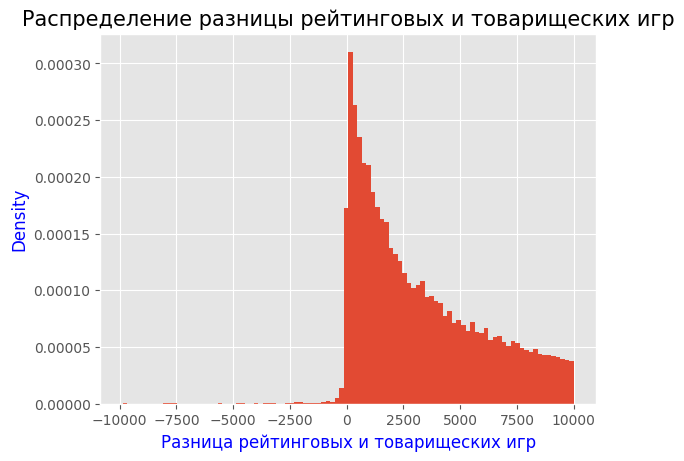

In [392]:
diff_status = dk["rated"] - (dk["games"] - dk["rated"])

plt.hist(diff_status[(diff_status < 10000) & (diff_status > -10000)], bins=100, density=True)
plt.xlabel("Разница рейтинговых и товарищеских игр", color="blue", fontsize=12)
plt.ylabel("Density", color="blue", fontsize=12)
plt.title("Распределение разницы рейтинговых и товарищеских игр", fontsize=15)
plt.show()

__Вывод__: Люди намного чаще играют рейтинговые игры, нежели товарищеские, однако если смотреть на моду, то она находится примерно в нуле

In [393]:
def hour(seconds: int) -> int:
    return seconds // 3600 + 1

hours = df["utc_time"].apply(hour).value_counts()
hours

17    1477
18    1451
16    1395
19    1375
15    1349
20    1300
14    1293
13    1203
12    1101
11    1062
21    1010
10     996
9      916
22     906
8      778
23     768
7      693
1      646
24     624
2      595
6      587
5      571
3      563
4      544
Name: utc_time, dtype: int64

In [394]:
x = hours.index
y = hours.values

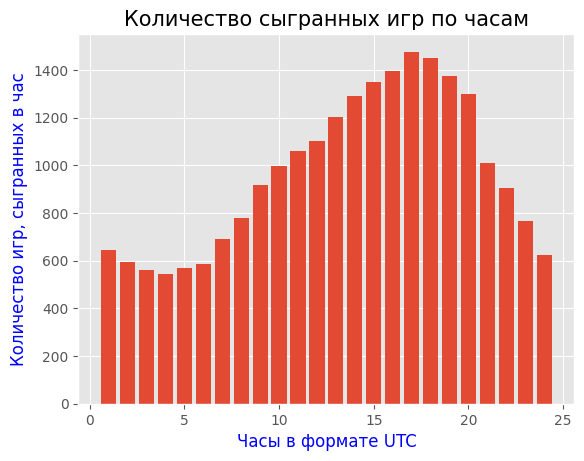

In [395]:
plt.bar(x, y)
plt.xlabel("Часы в формате UTC", color="blue", fontsize=12)
plt.ylabel("Количество игр, сыгранных в час", color="blue", fontsize=12)
plt.title("Количество сыгранных игр по часам", fontsize=15)
plt.show()

__Вывод__: видно, что чаще всего играют в шахматы в дневное азиатское время, в частности индусское, однако в америкоское время также наблюдается небольшой пик в количестве игр, что тоже логично

In [396]:
df["black_score"] = abs(df["white_score"] - 1)

dh = pd.concat([df[["white_score", "UltraBullet_x", "Bullet_x", "Blitz_x", "Rapid_x", "Puzzles_x"]],
               df[["black_score", "UltraBullet_y", "Bullet_y", "Blitz_y", "Rapid_y", "Puzzles_y"]]], axis=0)

dh = dh[["white_score", "UltraBullet_x", "Bullet_x", "Blitz_x", "Rapid_x", "Puzzles_x"]]
dh.rename(columns={"UltraBullet_x": "UltraBullet", "Bullet_x": "Bullet", "Blitz_x": "Blitz", "Rapid_x": "Rapid", "Puzzles_x": "Puzzles_x"}, inplace=True)

df.drop("black_score", axis=1, inplace=True)
dh.shape

(46406, 6)

In [397]:
corr = dh.corr()
corr.style.background_gradient(cmap='coolwarm')

,white_score,UltraBullet,Bullet,Blitz,Rapid,Puzzles_x
white_score,1.000000,0.009856,0.010621,0.031274,0.014918,0.012984
UltraBullet,0.009856,1.000000,0.351536,0.218851,0.160915,0.208031
Bullet,0.010621,0.351536,1.000000,0.498687,0.156799,0.311266
Blitz,0.031274,0.218851,0.498687,1.000000,0.198992,0.285248
Rapid,0.014918,0.160915,0.156799,0.198992,1.000000,0.284850
Puzzles_x,0.012984,0.208031,0.311266,0.285248,0.284850,1.000000


__Вывод__: заметим, что самая большая корреляция действительно наблюдается между рейтингом в Blitz и Bullet, также стоит отметить, что решение пазлов лучше больше всего влияет на Bullet, что интересно, ведь действительно когда мало времени на раздумие, нужно действовать на интуиции, которая сильнее всего развивается при помощи нарешивания пазлов

In [398]:
corr["white_score"].sort_values()

UltraBullet    0.009856
Bullet         0.010621
Puzzles_x      0.012984
Rapid          0.014918
Blitz          0.031274
white_score    1.000000
Name: white_score, dtype: float64

__Вывод__: очевидно, что рейтинг в Blitz оказывает наибольшее влияние на результаты в партиях Blitz, однако стоит заметить, что Rapid и Puzzles опять же, оказывает некоторое влияение на результаты, что являются такими режимами на подумать, они хорошо развивают шахматную интуицию и способность жумать структурировано в различных позициях в ходе партий

## Шаг 3: Давайте теперь попробуем разными способами определить, 10 наиболее важных признаков

In [399]:
X = df.drop('white_score', axis=1)
y = df['white_score']

In [400]:
# Создание экземпляра PCA
pca = PCA()

# Применение PCA к данным
transformed_data = pca.fit_transform(df)

# Получение коэффициентов компонент PCA
components = pca.components_

# Определение основных признаков
top_features_indices = np.abs(components[0]).argsort()[-10:][::-1]  # Пример для первой компоненты

# Получение названий основных признаков
top_features_names = df.columns[top_features_indices]

pca = pd.DataFrame({"top_features": top_features_names})

In [401]:
# Создание и обучение модели случайного леса
model = RandomForestClassifier()
model.fit(X, y)

# Получение важности признаков
feature_importances = model.feature_importances_

# Сортировка признаков по важности
top_features_indices = np.argsort(feature_importances)[::-1][:10]
top_features = X.columns[top_features_indices]

# Вывод топ 10 признаков
rd = pd.DataFrame({'top_features': top_features})

In [402]:
# Создание DataFrame с признаками и целевой переменной
data = pd.concat([X, y], axis=1)

# Рассчет корреляции между признаками и целевой переменной
correlation = data.corr()

# Сортировка признаков по абсолютному значению корреляции
top_features = correlation.abs().nlargest(11, 'white_score')['white_score'].index[1:]

# Вывод топ 10 признаков
cr = pd.DataFrame({'top_features': top_features})

In [403]:
# Создание модели для рекурсивного удаления признаков
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10)

# Обучение модели
selector.fit(X, y)

# Получение отобранных признаков
top_features_indices = selector.support_
top_features = X.columns[top_features_indices]

# Вывод топ 10 признаков
rfe = pd.DataFrame({'top_features': top_features})

# Сравнение топовых признаков разными способами

In [404]:
df1_styler = rd.style.set_table_attributes("style='display:inline;'").set_caption('RandomForest Classifier')
df2_styler = cr.style.set_table_attributes("style='display:inline;'").set_caption('Корреляции с целевой переменной')
df3_styler = rfe.style.set_table_attributes("style='display:inline;'").set_caption('Рекурсивное удаление признаков')
df4_styler = pca.style.set_table_attributes("style='display:inline;'").set_caption('PCA')


caption_style = "margin-bottom: 20px;"

df1_styler = df1_styler.set_caption(df1_styler.caption + f"<div style='{caption_style}'></div>")
df2_styler = df2_styler.set_caption(df2_styler.caption + f"<div style='{caption_style}'></div>")
df3_styler = df3_styler.set_caption(df3_styler.caption + f"<div style='margin-bottom: 5px;'></div>")
df4_styler = df4_styler.set_caption(df4_styler.caption + f"<div style='margin-bottom: 34px;'></div>")


space = "\xa0" * 30

display_html(space + df1_styler._repr_html_() + space + df2_styler._repr_html_() + space + df3_styler._repr_html_() + space + df4_styler._repr_html_(), raw=True)

,top_features
0,prop_x
1,win2loss_y
2,prop_y
3,utc_time
4,Blitz_y
5,Blitz_x
6,deviation_x
7,win2loss_x
8,deviation_y
9,draws_x


In [405]:
methods = [rd, cr, rfe, pca]
features = defaultdict(int)

for reduction in methods:
    for coef in range(10):
        features[reduction.values[coef][0]] += abs(10 - coef)

items = features.items()

sorted_items = sorted(items, key=lambda x: x[1], reverse=True)

for key, value in sorted_items:
    print(f"{key}:  {value}")


prop_x:  24
prop_y:  22
win2loss_y:  20
games_y:  20
wins_y:  14
Blitz_y:  12
Blitz_x:  12
win2loss_x:  12
losses_y:  12
rated_y:  8
utc_time:  7
utc_date:  7
games_x:  7
add_time:  6
rated_x:  6
Puzzle Racer_y:  5
deviation_x:  4
Puzzle Streak_y:  4
ind_greater_mean_x:  4
fix_time:  3
losses_x:  3
deviation_y:  2
ind_greater_mean_y:  2
wins_x:  2
draws_x:  1
draws_y:  1


__Вывод__: использовав несколько различных способов ранжирования признаков по их информативности и объединив их взвешенно, мы получаем следующий список, которые логически также интерпретируем: важнее всего рейтинг Blitz в Blitz играх, разделения всех игр на победы, поражения и ничьи, пазлы, которые помогают шахматисту быстрее думать в стандартных ситуациях и так далее, также видна роль признаков, которые были сделаны при помощи Feature Engeneering

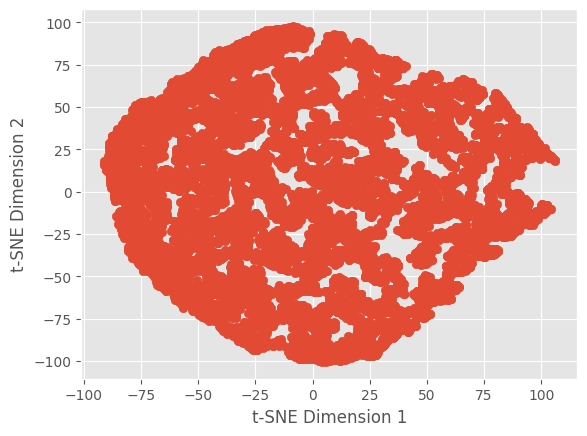

In [407]:
from sklearn.manifold import TSNE

# Создание экземпляра t-SNE
tsne = TSNE(n_components=2)

# Применение t-SNE к данным
transformed_data = tsne.fit_transform(df)

# Построение диаграммы рассеяния
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

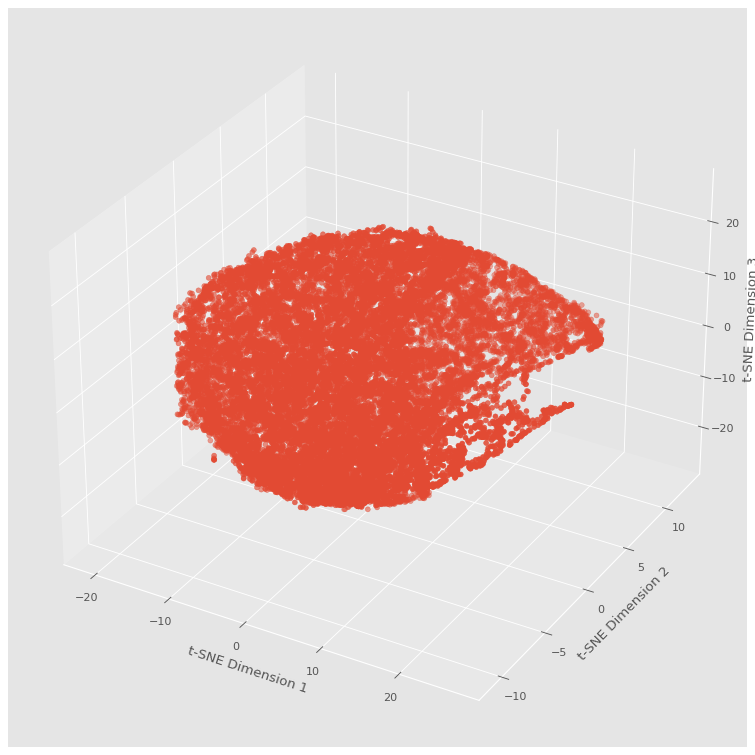

In [408]:
# Создание экземпляра t-SNE
tsne = TSNE(n_components=3)

# Применение t-SNE к данным
transformed_data = tsne.fit_transform(df)

# Построение трехмерной диаграммы рассеяния
fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2])
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

__Вывод__: просто можно посмотреть на то, как распределены наши объекты (примерно с сохранением их свойств, насколько это возможно) на плоскости и в трехмерном пространстве